In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Vegetable Images/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=40,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 15000 files belonging to 15 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Vegetable Images/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=40,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1802 files belonging to 15 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=15,activation='softmax'))

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 31, 31, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 29, 29, 64)        36928     
                                                      

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
375/375 [==============================] - 3148s 8s/step - loss: 2.1433 - accuracy: 0.4808 - val_loss: 0.6634 - val_accuracy: 0.7825
Epoch 2/32
375/375 [==============================] - 191s 507ms/step - loss: 0.7768 - accuracy: 0.7508 - val_loss: 0.5430 - val_accuracy: 0.8263
Epoch 3/32
375/375 [==============================] - 193s 514ms/step - loss: 0.4532 - accuracy: 0.8590 - val_loss: 0.2453 - val_accuracy: 0.9179
Epoch 4/32
375/375 [==============================] - 201s 533ms/step - loss: 0.3577 - accuracy: 0.8908 - val_loss: 0.2406 - val_accuracy: 0.9245
Epoch 5/32
375/375 [==============================] - 198s 525ms/step - loss: 0.2604 - accuracy: 0.9212 - val_loss: 0.3465 - val_accuracy: 0.9023
Epoch 6/32
375/375 [==============================] - 194s 515ms/step - loss: 0.2092 - accuracy: 0.9359 - val_loss: 0.1632 - val_accuracy: 0.9473
Epoch 7/32
375/375 [==============================] - 195s 518ms/step - loss: 0.2049 - accuracy: 0.9412 - val_loss: 0.3078 - v

In [ ]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

375/375 [==============================] - 64s 168ms/step - loss: 0.0301 - accuracy: 0.9927
Training accuracy: 0.9926666617393494


In [ ]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

46/46 [==============================] - 8s 150ms/step - loss: 0.3551 - accuracy: 0.9312
Validation accuracy: 0.9311875700950623


In [ ]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
training_history.history

{'loss': [2.143317222595215,
  0.7768251895904541,
  0.45321154594421387,
  0.3576970398426056,
  0.26035308837890625,
  0.2091718167066574,
  0.20490849018096924,
  0.17013244330883026,
  0.14460480213165283,
  0.1682664155960083,
  0.13908496499061584,
  0.13624724745750427,
  0.12308287620544434,
  0.12850244343280792,
  0.10600238293409348,
  0.09794755280017853,
  0.14903348684310913,
  0.0831066146492958,
  0.12830720841884613,
  0.09197301417589188,
  0.07641705870628357,
  0.09063389152288437,
  0.08088527619838715,
  0.10354848951101303,
  0.07915864884853363,
  0.10513366758823395,
  0.09639032185077667,
  0.1075725257396698,
  0.0923047885298729,
  0.05938580632209778,
  0.07747627794742584,
  0.10226142406463623],
 'accuracy': [0.48080000281333923,
  0.7508000135421753,
  0.859000027179718,
  0.8907999992370605,
  0.9211999773979187,
  0.93586665391922,
  0.9412000179290771,
  0.9505333304405212,
  0.9592666625976562,
  0.953000009059906,
  0.963533341884613,
  0.9606666564

In [ ]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 93.11875700950623 %


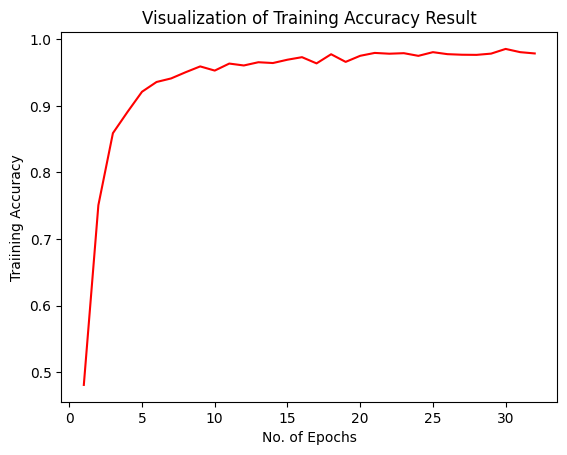

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

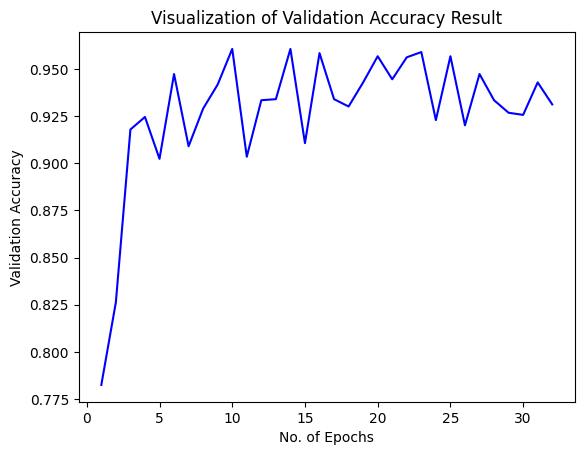

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Vegetable Images/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3000 files belonging to 15 classes.


In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

94/94 [==============================] - 524s 5s/step - loss: 0.3326 - accuracy: 0.9380
Test accuracy: 0.9380000233650208
